In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013.tar.gz
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/example_submission.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv


In [28]:
data = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv')

In [29]:
data.head(10)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,255 254 255 254 254 179 122 107 95 124 149 150...


In [30]:
import matplotlib.pyplot as plt

In [31]:
print(data['emotion'].value_counts())
print(data['emotion'].unique())
emotion_map = ['Angry', 'Digust', 'Fear','Happy', 'Sad', 'Surprise', 'Neutral']

emotion
3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: count, dtype: int64
[0 2 4 6 3 5 1]


<BarContainer object of 7 artists>

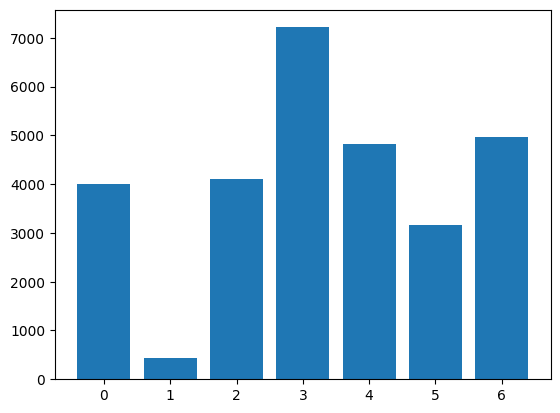

In [32]:
plt.bar(range(7),data['emotion'].value_counts()[range(7)])
#plt.xlabel(data['emotion'].unique())


In [33]:
sztest = len(data) * 80 // 100
sz_val = len(data)*90//100
train = data[:sztest]
val = data[sztest:sz_val]
test = data[sz_val:]

<BarContainer object of 7 artists>

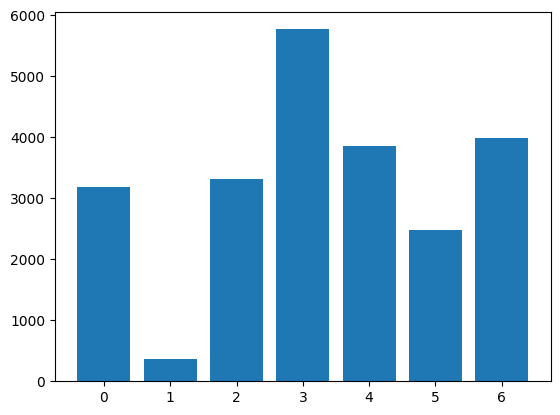

In [34]:
plt.bar(range(7),train['emotion'].value_counts()[range(7)])

<BarContainer object of 7 artists>

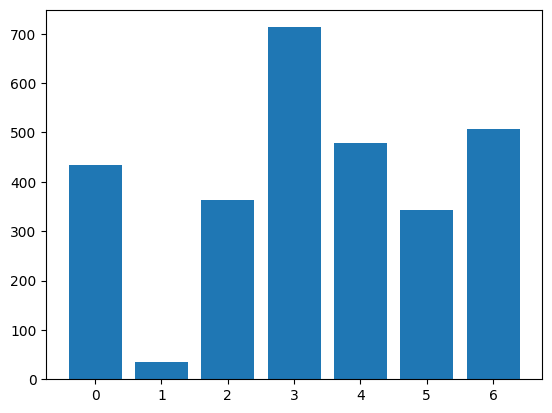

In [35]:
plt.bar(range(7),test['emotion'].value_counts()[range(7)])

In [36]:
print(test['emotion'].value_counts())
print(train['emotion'].value_counts())

emotion
3    713
6    506
4    478
0    434
2    363
5    343
1     34
Name: count, dtype: int64
emotion
3    5770
6    3981
4    3859
2    3318
0    3190
5    2487
1     362
Name: count, dtype: int64


In [37]:
train_y = train['emotion'].to_numpy()
train_x = train['pixels'].to_numpy()

test_y = test['emotion'].to_numpy()
test_x = test['pixels'].to_numpy()

train_X = np.array([[int(x) for x in trainx.split(' ')] for trainx in train_x])
test_X = np.array([[int(x) for x in testx.split(' ') ] for testx in test_x ])
train_X.reshape((-1,48,48,1))
print(train_X.shape)
print(train_X[:2])

(22967, 2304)
[[ 70  80  82 ... 106 109  82]
 [151 150 147 ... 193 183 184]]


In [38]:
val_y = val['emotion'].to_numpy()
val_x = val['pixels'].to_numpy()

val_X = np.array([[int(x) for x in valx.split(' ')] for valx in val_x])

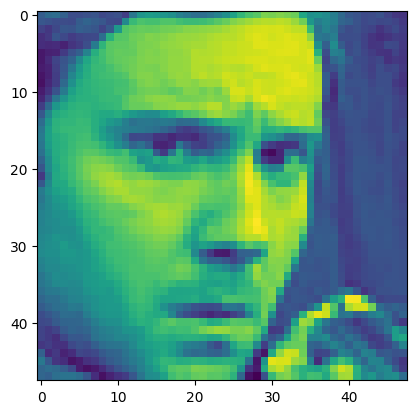

In [39]:
test_X.reshape((-1,48,48,1))
plt.imshow(train_X[0].reshape((48,48)))

In [40]:
train_Y = np.zeros((train_y.shape[0],7))
train_Y[range(train_y.shape[0]), train_y[range(train_y.shape[0])]] = 1
test_Y = np.zeros((test_y.shape[0],7))
test_Y[range(test_y.shape[0]), test_y[range(test_y.shape[0])]] = 1

In [41]:
val_Y = np.zeros((val_y.shape[0],7))
val_Y[range(val_y.shape[0]), test_y[range(val_y.shape[0])]] = 1

In [42]:
train_X = np.repeat(train_X, 3, axis=-1)

In [43]:
val_X = np.repeat(val_X,3,axis=-1)

In [44]:
test_X = np.repeat(test_X, 3, axis=-1).reshape((-1,48,48,3))
train_X = train_X.reshape((-1,48,48,3))
print(train_X.shape)

(22967, 48, 48, 3)


In [45]:
print(train_Y[:3])
print(test_Y[:3])

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
def build():
    num_features = 64
    model = Sequential()

    model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), input_shape=(48, 48, 3), data_format='channels_last'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())

    model.add(Dense(2*2*2*num_features))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(2*2*num_features))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(2*num_features))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    
    model.add(layers.Dense(7, activation='softmax'))
    
    return model

In [48]:
resnet_model = build()
resnet_model.summary()
# Biên dịch mô hình
resnet_model.compile(optimizer=Adam(learning_rate=0.0001,epsilon=1e-7),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 46, 46, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 46, 46, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 46, 46, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 46, 46, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 46, 46, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 23, 23, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 23, 23, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             

 Total params: 2,142,599 (8.17 MB)

 Trainable params: 2,139,015 (8.16 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [49]:
print(train_X.shape)

(22967, 48, 48, 3)


In [50]:
from tqdm import tqdm
datagen = ImageDataGenerator(
    rotation_range=40,            # Xoay ảnh ngẫu nhiên trong khoảng 40 độ
    width_shift_range=0.2,        # Dịch chuyển ngang ảnh ngẫu nhiên 20% chiều rộng
    height_shift_range=0.2,       # Dịch chuyển dọc ảnh ngẫu nhiên 20% chiều cao
    shear_range=0.2,              # Biến đổi xiên
    zoom_range=0.2,               # Phóng to/thu nhỏ ngẫu nhiên trong khoảng 20%
    horizontal_flip=True,         # Lật ngang ảnh ngẫu nhiên
    fill_mode='nearest'           # Điền giá trị cho các pixel bị thay đổi bằng giá trị gần nhất
)

val_X = val_X.reshape((-1,48,48,3))
print(val_X.shape)
train_X1 = train_X.tolist()
train_Y1 = train_Y.tolist()
for j in tqdm(range(22967)):
    img = train_X[j].reshape((1,48,48,3))
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        #plt.figure(i)
        #imgplot = plt.imshow(batch[0].astype('uint8'))  # Lấy ảnh đầu tiên từ batch
        train_X1.append((batch[0].astype('uint8')).reshape((48,48,3)))
        train_Y1.append(train_Y[j])
        i += 1
        if i % 2 == 0:  # Dừng sau khi đã tạo 5 ảnh
            break
train_X1 = np.array(train_X1)
train_Y1 = np.array(train_Y1)
print(train_X1.shape)
print(train_Y1.shape)

(2871, 48, 48, 3)


100%|██████████| 22967/22967 [00:50<00:00, 459.07it/s]


(68901, 48, 48, 3)
(68901, 7)


In [51]:
train_X = train_X1
train_Y = train_Y1
print(train_X.shape,train_Y.shape)

(68901, 48, 48, 3) (68901, 7)


In [52]:
class_labels = np.unique(train_Y.argmax(axis=1))  # Lấy danh sách các lớp

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=class_labels, y=train_Y.argmax(axis=1))

# Chuyển đổi thành từ điển để sử dụng trong Keras
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print(class_weights_dict)

his = resnet_model.fit(train_X, train_Y, epochs=30, batch_size=32, validation_split=0.1, class_weight = class_weights_dict)


{0: 1.028526645768025, 1: 9.06353591160221, 2: 0.9888487040385775, 3: 0.568630849220104, 4: 0.8502202643171806, 5: 1.3192601527945316, 6: 0.82416478271791}
Epoch 1/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 133s 64ms/step - accuracy: 0.1743 - loss: 2.0246 - val_accuracy: 0.2225 - val_loss: 1.8775
Epoch 2/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 113s 58ms/step - accuracy: 0.2838 - loss: 1.7559 - val_accuracy: 0.2535 - val_loss: 1.8387
Epoch 3/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 113s 58ms/step - accuracy: 0.3965 - loss: 1.4790 - val_accuracy: 0.3449 - val_loss: 1.7397
Epoch 5/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 113s 58ms/step - accuracy: 0.4533 - loss: 1.3346 - val_accuracy: 0.3608 - val_loss: 1.6569
Epoch 6/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 113s 58ms/step - accuracy: 0.5046 - loss: 1.2028 - val_accuracy: 0.3909 - val_loss: 1.5805
Epoch 7/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 113s 58ms/step - accuracy: 0.5502 - loss: 1.0890 - val_accuracy: 0.4150 - val_loss: 1.5357
Epoch 8/30
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 113s

KeyboardInterrupt: 

In [56]:

# Đánh giá mô hình trên tập test
test_loss, test_acc = resnet_model.evaluate(test_X, test_Y)
y_pred = resnet_model.predict(test_X)
print(f'Test accuracy: {test_acc:.4f}')
# plt.figure(figsize=(12, 4))
# plt.subplot(1,2,1)
# plt.plot(his.history['accuracy'],label = 'accuracy')
# plt.plot(his.history['val_accuracy'], label = 'val-accur')

# plt.legend()
# plt.subplot(1,2,2)
# plt.plot(his.history['loss'],label = 'loss')
# plt.plot(his.history['val_loss'], label = 'val-loss')
# plt.legend()

90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5856 - loss: 1.5593
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
Test accuracy: 0.5702


[5 3 2]


In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_Y.argmax(axis=1), y_pred.argmax(axis=1),average = 'macro')
recall = recall_score(test_Y.argmax(axis=1), y_pred.argmax(axis=1),average = 'macro')
f1 = f1_score(test_Y.argmax(axis=1), y_pred.argmax(axis=1),average = 'macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.53
Recall: 0.55
F1-Score: 0.53


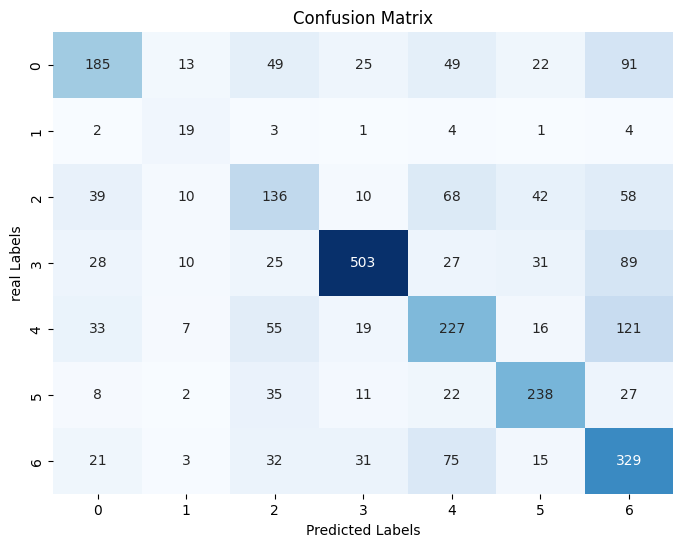

<Figure size 640x480 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(test_Y.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('real Labels')
plt.xlabel('Predicted Labels')

plt.show()

plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')